# Natural Language Processing (NLP)

## 1. Introduction

In this work, Natural Language Processing techniques are used to compare similarities between two texts. 

**Motivation**

Job search and hiring process can be very challenging and stressful. Applicant Tracking Systems (ATS) are founded in the recent decade to take a significant amount load out of HR professionals shoulders, who should have read hundreds of resumes almost everyday. ATS is a system that utilizes artificial intelligence to filter relevant resumes for a job ad. This can be achieved by mostly Natural Language Proccessing (NLP) techniques. As a job seeker, if you have not optimized your resume and getting constant rejects, then your resume might never be seen by an HR professional, because your resume is eliminated by ATS in the first phase. In this work, I try to analyze matching score of a resume and five random job ads.

**Roadmap**

First, we will clean the manually added texts step by step. Then, we define a function that repeats these processes. Lastly, we will add a text to compare the original text and find a similarity score.

<br><br>

## 2. Data Cleaning

**Importing Libraries**

In [126]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob

<br><br>

**Copy-Paste Text**

In [144]:
ad = []

In [145]:
# Ad 1
ad.append( """Innovative IoT solutions with Data, AI and ML|Ownership and responsibility
About Our Client

Do you want to advance AI & ML solutions in the industrial space? My client provides innovative e2e hard- and software solutions for a wide scope of industrial applications. The start-up company is backed by a large industrial investor and is looking for someone to join the Data team. Hence, I am looking for a Data Scientist (m/f/d) in Berlin who's ready to join a motivated team. Looking forward to speaking with you!

Job Description
Work in an array of Data Science projects
Data collection, data processing and data analysis.
Design and development of state-of-the-art algorithms in the fields of machine learning, statistical modeling, data mining and AI
Interpretation and visualization of data and their correlations
Work with colleagues to empower data-driven decisions
The Successful Applicant
Proficiency in Python programming
University degree in Computer Science, Mathematics, Electrical Engineering, Physics or comparable fields
Passion for data
Relevant experience in Data Science
Knowledge of Machine Learning
Understanding of Predictive Maintenance as well as Signal Processing
Experience with SQL, AWS, Git
Good applied statistics skills
Fluent communication in English
What's on Offer
Join an international and ambitious team
Founders featured in Forbes 30under30
Modern office in Berlin, remote work possible with flexible hours
Market-fair salary, diverse company benefits
Learning-friendly environment with flat hierarchies""")

In [146]:
# Ad 2
ad.append( """About The Position

We are looking for a top-tier data scientist (m/f/d) to join our team on a permanent position in Berlin / Germany.

Your mission

Work intensively on the development and continuous enhancement of our cutting-edge, data-driven, ML-based, systematic investment strategies as part of our asset allocation squad
Build and maintain quantitative forecasting models and algorithms
Be involved in the further development and implementation (e.g., conducting experiments as well as evaluations) of our hypothesis-driven research agenda along key building blocks (e.g., data, transformations, model(s), targets) relevant for product performance
Implement your ideas in clean and efficient Python code

Your Skillset

Degree in a quantitative field such as Mathematics, Statistics, Physics, Computer Science, or Economics/Finance with quantitative focus
Solid knowledge of data analytics in Python as well as corresponding state-of-the-art tools and frameworks
Experience in working with data, building quantitative models, data-driven decision-making
Experience in (financial) econometrics and time series analysis
We expect you to share our passion for or quantitative investing
Fluent in spoken and written English, good communication skills
Bonus: experience with financial markets data and instruments (e.g. stocks, bonds, derivatives)

Why us?

An exciting and involving role with significant impact on shaping the future of AI-based sustainable investing
A company culture that is based on a spirit of cooperation and is characterized by a high level of quality awareness, openness and attention to detail in all areas of our work
The opportunity to work in an interdisciplinary team with our experienced quant finance, software engineering, and machine learning experts
Flexible working hours, 28 days paid leave and a competitive salary and equity package
A modern loft office in Berlin, Prenzlauer Berg, healthy food (including coffee, juices, fruit, vegetables, sandwiches) and high-end hardware from Apple
Internal workshops, unique learning possibilities across a wide range of domains as well as amazing team events


We are a deep tech pioneer, providing AI-based investment solutions to our clients. Building on the best practices of quantitative asset management we tap the potential of machine learning for sustainable investments on capital market.

Our interdisciplinary team consists of experts in the fields of finance, computer science, software engineering, machine learning as well as mathematics, physics, and neuroscience. Othoz is embedded in the global AI community, through a close exchange with leading universities and as a member of Inquire Europe.

To date Othoz is one of the leading drivers for AI-based analyses and decision-making processes in asset management. Othoz has been founded in 2017, is headquartered in Berlin, Germany and is backed by leading international business angels and VCs.""")

In [147]:
# Ad 3
ad.append( """Marley Spoon is the new way to cook. We bring delightful, market fresh and easy cooking back to the people while building a sustainable supply chain for a waste-free world. We’re a well-funded and publicly listed company (ASX: MMM).

We operate across 3 continents and in 8 countries with over +900 employees worldwide. Being passionate foodies, we are using technology to reinvent the global food supply chain to reduce food waste. In the end, it's simple: We started Marley Spoon because we love cooking! We now have an exciting opportunity to bring a Data Scientist on board our team, working across all brands and territories. This is a once-in-a-lifetime opportunity to be part of the food revolution and join our food-tech start-up as we take our growth to the next level.

As a part of the team, you'll be responsible for:
Building a range of analytical models (Prescriptive, Predictive, Diagnostic, Descriptive)
Building predictive and segmentation models (e.g. RFM segmentation, churn prediction, sentimental analysis, recommendation engines, next best offer, propensity scoring models, etc.) making use of relevant data from multiple data sources
Deploying, maintaining and improving the models using various types of algorithms and techniques
Mine data from multiple sources and to build/enhance stored procedures/functions
Providing deep-dive analytical support for the business

Requirements
MSc or Ph.D. in a quantitative discipline: Machine Learning, Computer Science, Statistics, Applied Mathematics, Physics or related fields
Experience in a Data Science related role
Hands-on experience in building segmentation and prediction models with large datasets using various algorithms and techniques (decision trees, logistic regression, neural networks, clustering, etc.)
Hands-on experience in Python and common numerical and ML packages (NumPy, SciPy, Scikit-Learn, Pandas, Keras, TensorFlow, PyTorch, and PySpark)
Good software engineering practices e.g. unit tests, logging, CI/CD pipelines, software patterns and experience developing production software
Sound knowledge of classic prediction processes (classification, regression, ranking, time series), and inferential statistics (tests, interpretation of models)
Experienced dealing with large amounts of data and knowledge of big data technologies (e.g. SageMaker, AirFlow, Snowflake, Looker)

Benefits
An open, diverse culture with over 50 nationalities of friendly, fun-loving foodies!
A company that’s growing fast, with plenty of opportunities for personal and professional growth
Flexible working hours; hybrid work policy (remote + office)
30 paid days off per year
5 training days per year and online courses licenses
Possibility to be a part of Marley Spoon’s success with an outstanding equity program
Corporate pension scheme (we add 20% on top of your contribution)
Free Marley Spoon and/or Dinnerly boxes delivered to your doorstep
Gym membership and language course discounts
Friday drinks and plenty of fun team events
A beautiful office by the canal in buzzing Kreuzberg, with free food from our test kitchen""")

In [148]:
# Ad 4
ad.append( """Why Lhotse

At Lhotse, we are reinventing how organizations use data and technology to buy goods and services.We are on a mission to reimagine how companies manage their spend by bringing the first true B2C experience to procurement teams. Check out our website to learn more.

Join us and get the unique opportunity to:

Embark on a VC-backed rocket ship - we count some of Germany's most successful tech entrepreneurs among our Angel investors
Contribute to solving global problems faced by millions of companies and their employees, every day
Be part of a highly motivated and diverse team that will support and challenge you as you grow and develop

See who your future teammates will be: Lhotse on LinkedIn

About The Team

The Data Science team develops models and leverages its expertise to offer the best experience and products. Using Statistics, Artificial Intelligence, and a lot of creativity, our team strives for cutting-edge model development techniques. From statistical heuristics to deep learning, data is taken seriously to better develop, scale and optimize our business needs.

Our team principles

We care about the person behind the dice
Miscellaneous sets do not overlap
We reinforce our learnings
Data is no magic bullet (not yet at least)
Iterate fast!


WHAT YOU WILL DO AND WHAT IS EXPECTED FROM YOU?
Build data products that delight our customers and contribute to company success
Own your projects from the business problem to the code in production, including
the analysis of vast amounts of data
the development and maintenance of data pipelines
the monitoring of your data products after deployment
Build our machine learning infrastructure and best practices
Curiosity to look for ways to improve what has already been done
Solid knowledge in collecting and cleaning data for analysis and models
Excellent ability to interact with multidisciplinary teams
Willingness to learn quickly and work in a fast-paced environment


HOW WILL YOU DO IT?

Machine Learning You apply regressors, classifiers, and recommenders. You understand in detail the underpinning of ML techniques. Applied experience in setting machine learning models into production is a plus.
Software Engineering You are fluent in a modern programming language (Python/Scala).
Analytics You can transform data into wisdom. You know how to test hypotheses. You are proficient with an analytics tool (Python/R) and with SQL.


What You Will Get

Growth ― We place importance on building a fun and productive environment where we give space to people to develop and fulfil their potential
Impact ― Exposure to the whole journey as one of the first members of the adventure
Freedom ― Flexible working hours, ability to partly work remotely, 28 days of vacation
Rewards ― Competitive compensation and VSOP
Fun ― Beautiful office in the center of Berlin Mitte and regular team events and opportunities :)

How to apply

Share with us your CV or LinkedIn profile (if you believe it paints an adequate picture of your profile)
Please don’t send a cover letter. Instead, we’d like to read or hear (1) what is the achievement you’re the proudest about and (2) what is one contribution you will bring to our team: a short paragraph or 1 min voice message works.
If you have a portfolio / code that you think is worth looking at, please provide a link. We appreciate your work and are interested in taking a look!
Let us know about your availability
""")

In [149]:
# Ad 5
ad.append( """Esprit isn’t just an Employer. It is more than a fashion brand, staying true to our core values of sustainability and diversity.

We are looking for real personalities. Smart characters with attitude, corners and edges. We love what we do. And so should you.

You are a team-player loving to take challenges together with your colleagues?

You would like to work in a company whose products are well-known and support such company in its success?

Then apply now as

Data Scientist (m/f/d)

to support our Team. (ID 19981)

Your tasks
You perform data analysis on large scale data sets in the context of marketing data
You define and provide relevant customer and product master data for personalization and segmentation
You design, implement and analyze A/B tests to fine tune customer profiling
You run machine learning projects from start to end
You develop predictive and analytical models to provide insights to improve our communication with our customers
You work closely with CRM, Digital marketing, External agencies etc.
You implement various measures to evaluate the performance of implemented projects/the development of reports
You constantly observe the market and optimize existing models and technology within the scope of personalization initiatives
Your skills
You have an IT degree with focus on business administration or similar qualification with wide professional experience in a comparable position
You have experience with data science programming languages such as SQL, Python, and Pyspark and Microsoft Azure stack Databricks, Data Lake, Power BI , and SQL Database
You have proficient command of English
You have the ability to understand and grasp concepts
You have a hands-on mentality and a solutions and focused way of working
You are characterized by your structured and analytical way of thinking and understanding
Our Benefits
We have a flexible mobile office arrangement that allows you to choose your work location at least two days a week, plus we have every second Friday off
We are a team that places a lot of value on collegial and open cooperation, open feedback is always appreciated
With us you get 40% staff discount on our entire product range
We don't have a dresscode, you can wear whatever you feel comfortable in. Get inspired https //to.esprit.com/shop
We offer you of course a subsidy for public transport or you can park on one of our free parking spaces
We have an award-winning canteen that provides you with really tasty and healthy food every day
Are you a good match for this Job?

Then please submit an application with your salary expectations and an indication of your earliest starting date. Please feel free to contact Jan Limbach if you have any questions.""")

In [150]:
text = " ".join(ad)

<br><br>

**Flatting the text**

In [92]:
text = " ".join(text.lower().split("\n"))

In [93]:
text

"innovative iot solutions with data, ai and ml|ownership and responsibility about our client  do you want to advance ai & ml solutions in the industrial space? my client provides innovative e2e hard- and software solutions for a wide scope of industrial applications. the start-up company is backed by a large industrial investor and is looking for someone to join the data team. hence, i am looking for a data scientist (m/f/d) in berlin who's ready to join a motivated team. looking forward to speaking with you!  job description work in an array of data science projects data collection, data processing and data analysis. design and development of state-of-the-art algorithms in the fields of machine learning, statistical modeling, data mining and ai interpretation and visualization of data and their correlations work with colleagues to empower data-driven decisions the successful applicant proficiency in python programming university degree in computer science, mathematics, electrical engi

<br><br>

**Cleaning Punctuations**

In [94]:
text = re.sub(r"[^\w\s]","",text)

In [95]:
text

'innovative iot solutions with data ai and mlownership and responsibility about our client  do you want to advance ai  ml solutions in the industrial space my client provides innovative e2e hard and software solutions for a wide scope of industrial applications the startup company is backed by a large industrial investor and is looking for someone to join the data team hence i am looking for a data scientist mfd in berlin whos ready to join a motivated team looking forward to speaking with you  job description work in an array of data science projects data collection data processing and data analysis design and development of stateoftheart algorithms in the fields of machine learning statistical modeling data mining and ai interpretation and visualization of data and their correlations work with colleagues to empower datadriven decisions the successful applicant proficiency in python programming university degree in computer science mathematics electrical engineering physics or compara

<br><br>

**Cleaning Numbers**

In [96]:
text = re.sub(r"\d","",text)

<br><br>

**Cleaning Stopwords**

In [28]:
#stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sevdeaydin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
sw = stopwords.words('english')

In [98]:
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [99]:
text = list(filter(lambda x: x not in sw,text.split()))

In [47]:
# Alternative
# text = [x for x in text.split() if x not in sw ]

In [100]:
text[:5]

['innovative', 'iot', 'solutions', 'data', 'ai']

<br><br>

**Lemmatization**

In [101]:
text = [Word(i).lemmatize() for i in text]

In [102]:
text[:5]

['innovative', 'iot', 'solution', 'data', 'ai']

<br><br>

**Adding Phrases**

In [112]:
for n in [2,3]:
    for i in TextBlob(" ".join(text)).ngrams(n):
        text.append(" ".join(i))

<br><br>

**Word Frequencies**

In [117]:
df = pd.DataFrame({"words":text})

In [118]:
df.head()

,words
0,innovative
1,iot
2,solution
3,data
4,ai


In [119]:
df["frequency"] = [text.count(word) for word in text]

In [121]:
df = df.sort_values(by= "frequency",ascending= False).drop_duplicates()

In [122]:
df.head()

,words,frequency
39,data,11
53,work,3
24,industrial,3
75,ai,3
32,looking,3


<br><br>

**Removing Low Frequencies**

In [123]:
df = df[df["frequency"] > 1]

In [124]:
df.tail()

,words,frequency
146,company,2
259,machine learning,2
662,data data science,2
256,data science,2
7,client,2


<AxesSubplot:xlabel='frequency', ylabel='words'>

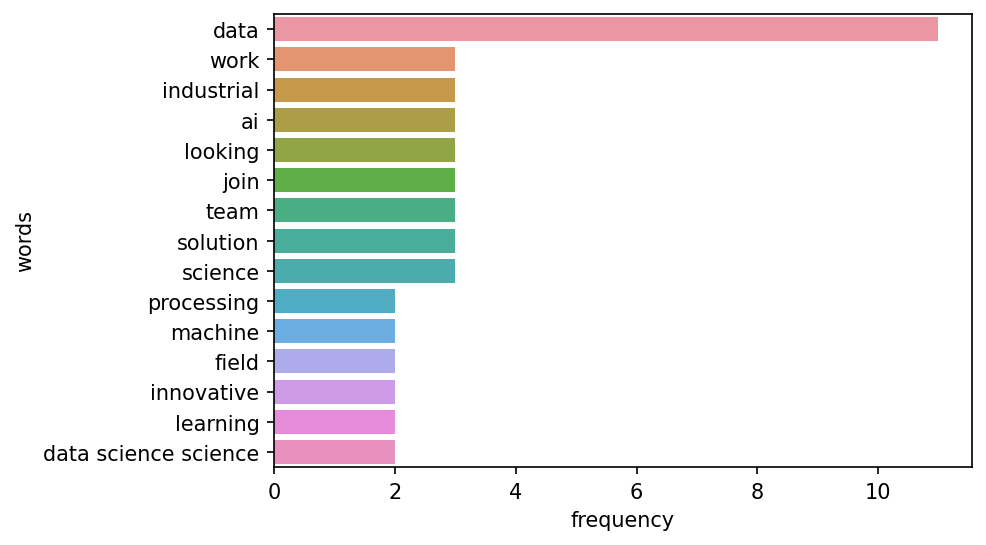

In [127]:
plt.figure(dpi = 150)
sns.barplot(data = df[:15], x = "frequency", y = "words")

<br><br>

## 3. Define Data Cleaning Function

In this section, we define a function that automize the cleaning processes.

In [215]:
def clean_text(text):
    
    #Cleaning \n
    text = " ".join(text.lower().split("\n"))
    
    #Cleaning Punctuations
    text = re.sub(r"[^\w\s]","",text)
    
    #Cleaning Numbers
    text = re.sub(r"\d","",text)
    
    #Removing Stopwords
    sw = stopwords.words('english')
    text = list(filter(lambda x: x not in sw,text.split()))
    
    #Lemmatization
    text = [Word(i).lemmatize() for i in text]
    
    #Adding Phrases
    for n in [2,3]:
        for i in TextBlob(" ".join(text)).ngrams(n):
            text.append(" ".join(i))
    
    #Creating Dataframe
    df = pd.DataFrame({"words":text})
    df["frequency"] = [text.count(word) for word in text]
    df = df.sort_values(by= "frequency",ascending= False).drop_duplicates()
    #df = df[df["frequency"] > 1]
    
    return df

In [154]:
ads = clean_text(text)

In [155]:
ads.head()

,words,frequency
739,data,40
800,team,21
1156,model,15
810,experience,14
165,work,14


We divide frequencies to five, since the text consists of five ads.

In [166]:
ads["frequency"] = ads["frequency"]/5

In [167]:
ads.head()

,words,frequency
739,data,8.0
800,team,4.2
1156,model,3.0
810,experience,2.8
165,work,2.8


<br><br>

## 4. Comparison of Texts

In [156]:
resume = """O. Faruk Aydin
Data Scientist
 
5+ years of experience as an academician at Turkish-German University.
In addition to assisting and giving various lectures, e.g., Probability and Statistics for Data Science, at the engineering faculty and following my academic research on Transportation and Data Science, co-teaching with professors of Berlin Technical University and creating many projects.
5+ years of experience in the industry.
As a production development and data analysis engineer, I had participated and led various projects, e.g., data analysis, feasibility reports, R&D projects like building 3D-Concrete-production system, determining prices of all facility services and so on.
Within the framework of my MSc and PhD studies, I have implemented many statistical analysis, programming, data analysis, optimization and transportation related real life projects. I have experience especially in Traffic Management and Matching Algorithms for Ride- Sharing.
I have excellent communication skills and teamwork experience.
I have been always an excellent team player and get along well with my co-workers, managers and advisors, as well as my dear students.
 

Personal Info	Work History

 
Email
farukaydin21@gmail.com

Phone
+90 532 357 5321

GitHub
https://github.com/DrFarukAydin

LinkedIn
https://www.linkedin.com/in/ofaydin/

Skills

 
Python (pandas, numpy, matplotlib, seaborn, sci-kit learn, scipy, statsmodel)

Machine learning (Regression, Classification, Clustering)

Data Analysis, BI (Tableau) Statistical Analysis (SPSS) SQL
Languages

 
English German Turkish
Hobby

 
Creating Crypto Bots Ping Pong
 
2017-05
- present











2012-08
- 2017-05













2012-01
- 2012-08









Education

2006
- 2011
 
Research Assistant, Ph.D.
Turkish-German University, Istanbul
Teaching lectures, e.g., Data Science related lectures (probability and statistics, programming, etc.), H&S lectures, Mechanic lectures (Fluid Mechanics, Static, Strength of Materials etc.)
Conducting academic studies, mostly focused on Intelligent Transportation and Data Science.
Assisting the professors, mainly from Berlin Technical University. Supporting or leading students’ projects as a consultant.

Product Development and Data Analysis Engineer
ISTON A.S., Istanbul
Data analysis for various projects.
Prepare feasibility reports and related documents for the machines and technologies related to new production methods.
Planning of production processes of the factories to improve cost / quality efficiency.
Research for new manufacturing technologies and production methods. Searching and contacting the manufacturers of new machines for the company. Managing product specifications on the company's ERP system.

Construction Supervisor
Zinde Musavirlik, Istanbul
Collaborated with management and fellow supervisors to organize operations and achieve demanding schedule targets.
Supervised material usage and contractor man-hours to keep projects in line with budgetary restrictions.
Supervised field crews to maximize quality and work efficiency.



Civil Engineering, B.Sc.
Bogazici University, Istanbul
 

 
2011
- 2013
 
Civil Engineering (Transportation), M.Sc.
Bogazici University, Istanbul
 

 
2013
- 2019
 
Civil Engineering (Transportation), Ph.D.
Bogazici University, Istanbul
 
Projects

 
2022-06
- present

















2018-09
- 2019-01



















Courses
 
Co-Author
Investigating driving factors of mobility during COVID19 Pandemic
 Goal: Producing high quality Academic Publications using mobility reports and state- of-art Data Science tools.
Analyzing data requirement.
Finding and collecting the data from various sources.
Conducting Meetings with the co-authors for presenting the ongoing processes and deciding roadmap.
Running statistical analysis with sci-kit learn, scipy and statsmodels. Performing Machine Learning algorithms for advanced analysis.
Working with GitHub for cooperation. Creating Tableau visualizations.
Preparing Academic Publications.

Consultant / Team Leader
Creating a smartphone app to help hitchhiker students at the campus
 Goal: Creating an app that matches hitchhikers and drivers
Making a presentation to the students as the person who produced the project idea.
In the framework of a project lecture, eight mechatronics and industrial engineering students who volunteered were assigned for this project.
A Survey with 604 people is performed at the campus to reveal driving factors for hitchhiking. Among these people, there are students, academics, administrative staff and other workers.
Survey data was analyzed by a team of industrial engineering students guided by me.
A smartphone app was created by mechatronics engineering students.
A project report and presentation were created by the students and evaluated by me.
 

 
Python A-Z™: Data Science and Machine Learning
Udemy: Mustafa Vahit Keskin

2022 Python for Machine Learning & Data Science Masterclass
Udemy: Jose Portilla

The Complete Tableau Bootcamp for Data Visualization
Udemy: Jose Portilla

Spark and Python for Big Data with PySpark
Udemy: Jose Portilla

Python for Financial Analysis and Algorithmic Trading
Udemy: Jose Portilla"""

In [157]:
res = clean_text(resume)

In [158]:
res.head()

,words,frequency
201,data,19
382,project,12
41,analysis,11
416,student,9
490,data science,7


In [168]:
df_comp = ads.merge(res, how="left", on = "words")

In [169]:
df_comp.head()

,words,frequency_x,frequency_y
0,data,8.0,19.0
1,team,4.2,3.0
2,model,3.0,NaN
3,experience,2.8,4.0
4,work,2.8,2.0


In [170]:
df_comp.columns

Index(['words', 'frequency_x', 'frequency_y'], dtype='object')

In [172]:
df_comp.columns = ['words', 'freq_ad', 'freq_resume']

In [182]:
df_comp = df_comp.fillna(0)

In [183]:
df_comp["difference"] = df_comp["freq_ad"] - df_comp["freq_resume"]

In [184]:
df_comp

,words,freq_ad,freq_resume,difference
0,data,8.0,19.0,-11.0
1,team,4.2,3.0,1.2
2,model,3.0,0.0,3.0
3,experience,2.8,4.0,-1.2
4,work,2.8,2.0,0.8
...,...,...,...,...
364,investing,0.4,0.0,0.4
365,impact,0.4,0.0,0.4
366,future,0.4,0.0,0.4
367,detail,0.4,0.0,0.4


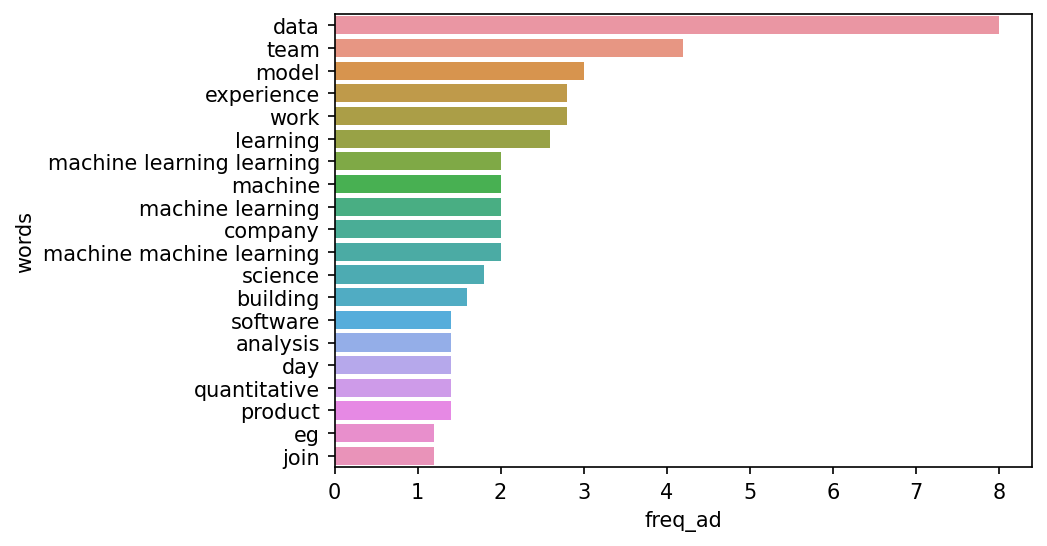

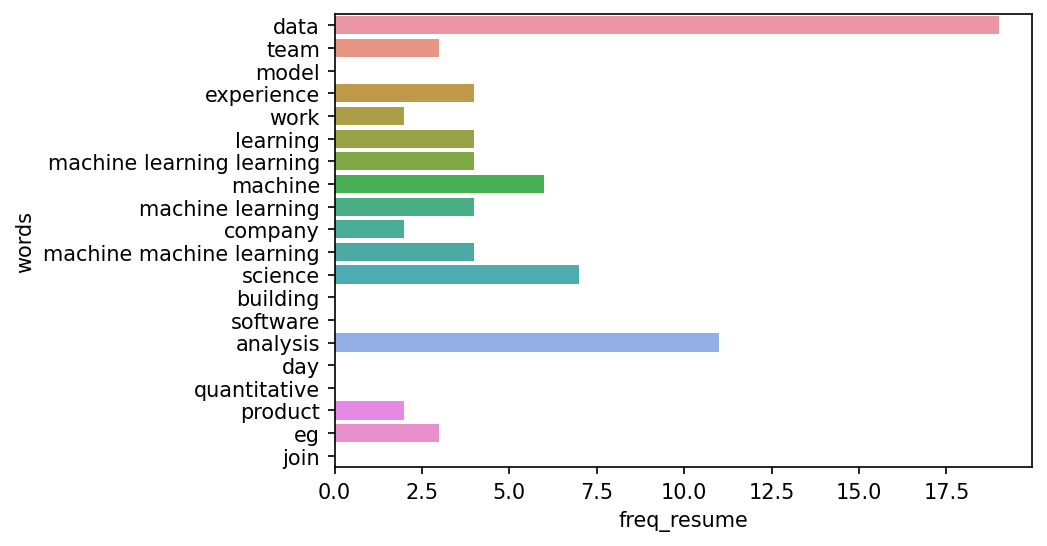

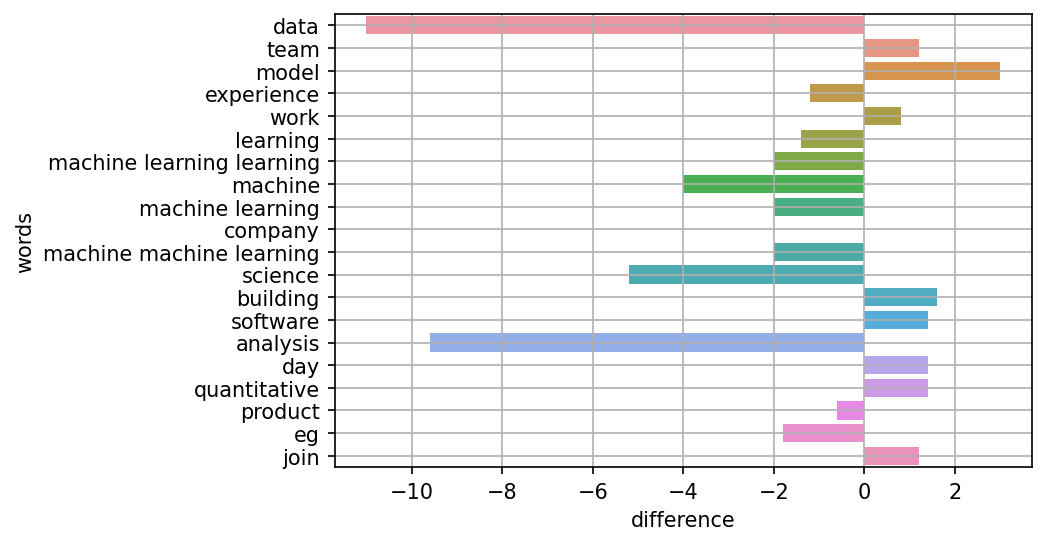

In [186]:
plt.figure(dpi=150)
sns.barplot(data=df_comp[:20], x="freq_ad", y = "words")
plt.show()

plt.figure(dpi=150)
sns.barplot(data=df_comp[:20], x="freq_resume", y = "words")
plt.show()

plt.figure(dpi=150)
sns.barplot(data=df_comp[:20], x="difference", y = "words")
plt.grid()
plt.show()

As seen from the plots, in the resume the word "data" is used more than enough, yet, the word "model" is never used despite the fact that in average there are three "model" word in each job ad. Similarly, we can analyze each word to make the resume better and increase the chance of finding a job.

<br><br>

## 5. Final Function of Comparison of Texts

In [187]:
def compare_texts(text,resume, number_of_ads = 5, show_result_no = 20):
    
    # Clean Ads
    ads = clean_text(text)
    ads["frequency"] = ads["frequency"]/number_of_ads
    
    # Clean Resume
    res = clean_text(resume)
    
    # Merge dataframes
    df_comp = ads.merge(res, how="left", on = "words")
    df_comp.columns = ['words', 'freq_ad', 'freq_resume']
    df_comp = df_comp.fillna(0)
    df_comp["difference"] = df_comp["freq_ad"] - df_comp["freq_resume"]
    
    #Plot the results
    plt.figure(dpi=150)
    sns.barplot(data=df_comp[:show_result_no], x="freq_ad", y = "words")
    plt.show()

    plt.figure(dpi=150)
    sns.barplot(data=df_comp[:show_result_no], x="freq_resume", y = "words")
    plt.show()

    plt.figure(dpi=150)
    sns.barplot(data=df_comp[:show_result_no], x="difference", y = "words")
    plt.grid()
    plt.show()
    
    return df_comp

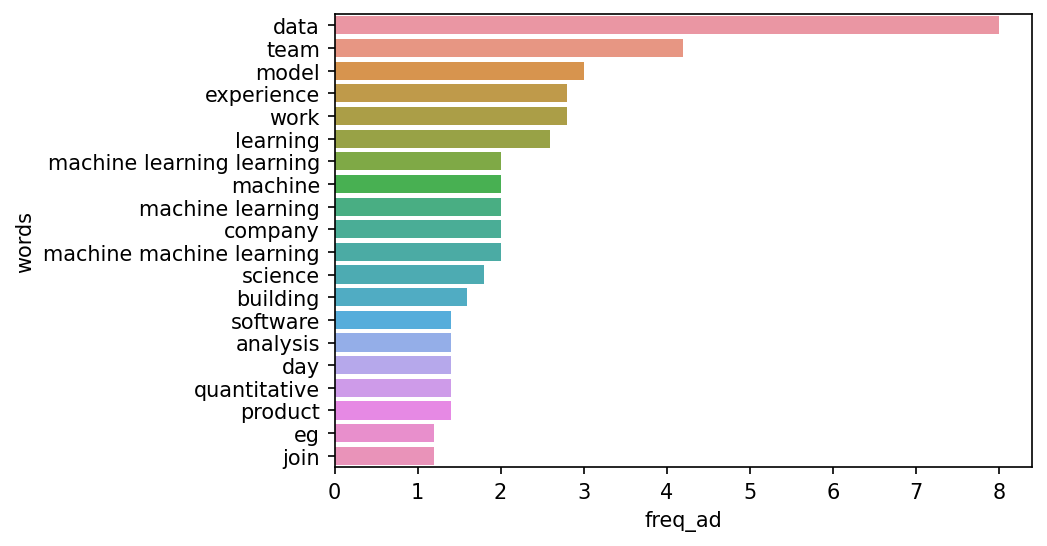

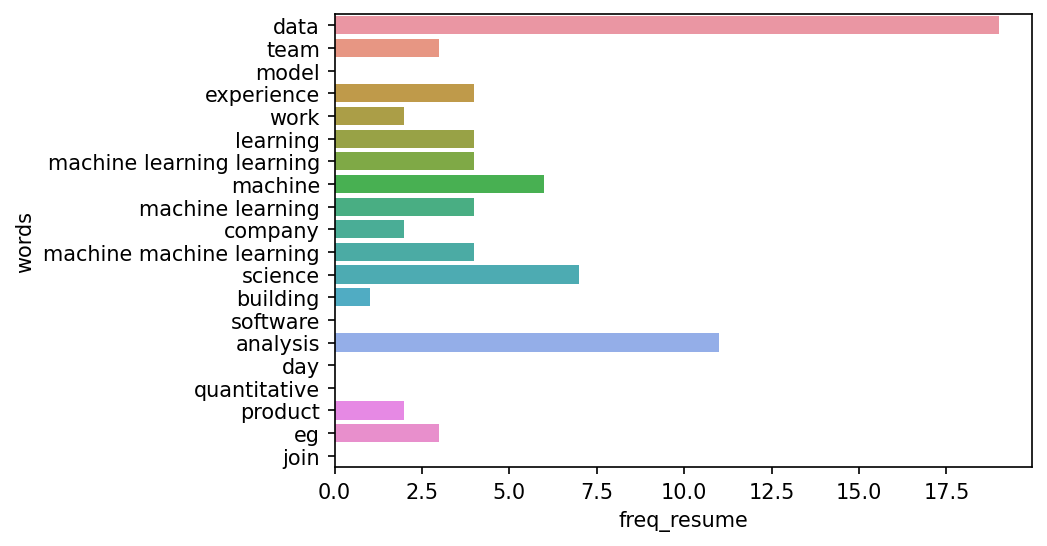

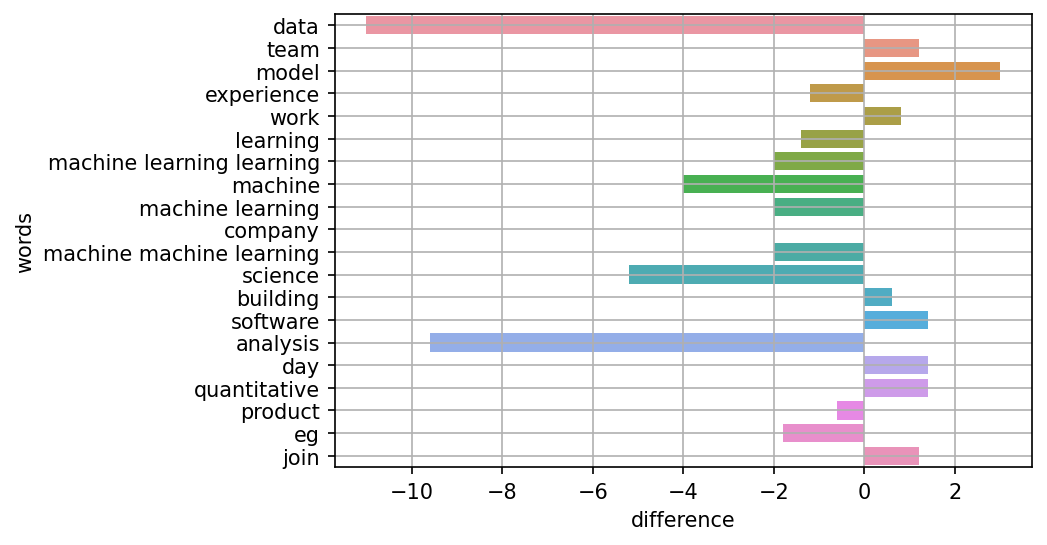

In [205]:
final_df = compare_texts(text,resume)

In [206]:
final_df.sort_values(by = "difference", ascending=False).head(15)

,words,freq_ad,freq_resume,difference
2,model,3.0,0.0,3.0
16,quantitative,1.4,0.0,1.4
15,day,1.4,0.0,1.4
13,software,1.4,0.0,1.4
1,team,4.2,3.0,1.2
26,opportunity,1.2,0.0,1.2
25,food,1.2,0.0,1.2
20,office,1.2,0.0,1.2
19,join,1.2,0.0,1.2
22,looking,1.2,0.0,1.2


In [207]:
final_df.sort_values(by = "difference", ascending=False).tail(15)

,words,freq_ad,freq_resume,difference
4125,report,0.2,4.0,-3.8
27,python,1.0,5.0,-4.0
7,machine,2.0,6.0,-4.0
11,science,1.8,7.0,-5.2
132,data analysis,0.6,6.0,-5.4
100,data analysis analysis,0.6,6.0,-5.4
106,data data analysis,0.6,6.0,-5.4
28,data science science,1.0,7.0,-6.0
29,engineering,1.0,7.0,-6.0
36,data data science,1.0,7.0,-6.0


There it is. Now our final function compares the job ads and the resume. Before I conclude, I want to add another feature that is related to this topic.

<br><br>

**Programming Languages**

Since we are looking at a data scientist resume, then we should also consider programming languages that may be referred in an ad just once but more important than other words for sure.

In [208]:
prog_lang = ["python", "scala", "r", "aws", "azure", "excel", "tableau", "powerbi", "qlik", "sql","sas"]

In [216]:
df_comp[df_comp["words"].isin(prog_lang)]

,words,freq_ad,freq_resume,difference
27,python,1.0,5.0,-4.0
46,sql,0.8,0.0,0.8


In [229]:
len(" ".join(resume.split("\n")).split())

682

<br><br>

**Thanks for following**

Dr. Ömer Faruk Aydın